Найти численно или аналитически вероятности P0(t), P1(t), P2(t), P3(t), P4(t), если
P0(0) = 1 и заданы конкретные числовые значения интенсивностей λij

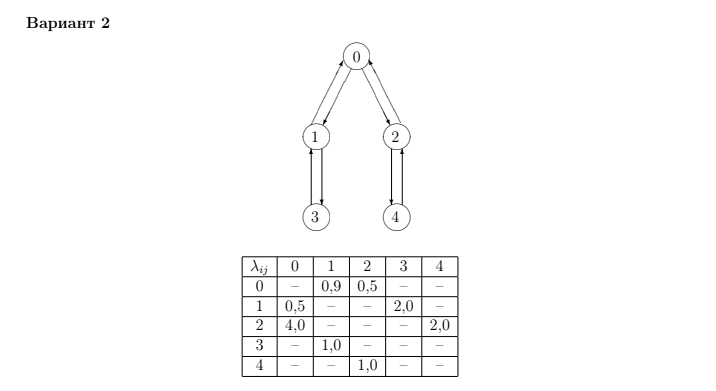


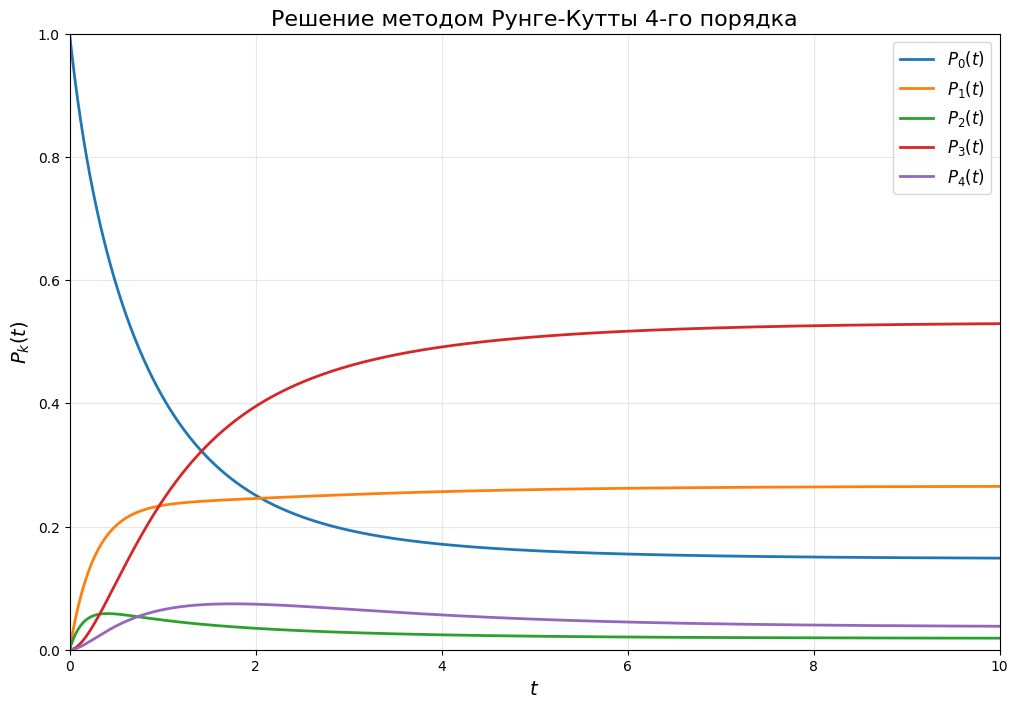

Сумма вероятностей: 1.0000000000000027
Время: 10.000
  P0: 0.148687649
  P1: 0.265140411
  P2: 0.018768151
  P3: 0.529290290
  P4: 0.038113500


In [1]:
import numpy as np

# Матрица коэффициентов
A = np.array(
    [
        [-1.4, 0.5, 4.0, 0, 0],
        [0.9, -2.5, 0, 1.0, 0],
        [0.5, 0, -6.0, 0, 1.0],
        [0, 2.0, 0, -1.0, 0],
        [0, 0, 2.0, 0, -1.0],
    ]
)

# Функция правой части системы: dP/dt = A @ P
def f(P):
    return A @ P  # не зависит от t


# Параметры метода
h = 0.001  # шаг времени
T = 10.0  # конечное время
steps = int(T / h)

# Начальные условия
P = np.array([1.0, 0.0, 0.0, 0.0, 0.0])  # P(0)

# Массивы для хранения результатов
time_points = np.linspace(0, T, steps + 1)
P_history = np.zeros((steps + 1, 5))
P_history[0] = P

# Метод Рунге-Кутты 4-го порядка
for i in range(steps):
    k1 = f(P)
    k2 = f(P + 0.5 * h * k1)
    k3 = f(P + 0.5 * h * k2)
    k4 = f(P + h * k3)

    P = P + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    P_history[i + 1] = P

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for k in range(5):
    plt.plot(time_points, P_history[:, k], label=f"$P_{k}(t)$", linewidth=2)

plt.xlabel("$t$", fontsize=14)
plt.ylabel("$P_k(t)$", fontsize=14)
plt.title("Решение методом Рунге-Кутты 4-го порядка", fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.show()


def get_snapshot(t_target):
    """Возвращает словарь значений P_k в момент t_target"""
    index = np.argmin(np.abs(time_points - t_target))
    snap = {
        "time": time_points[index],
        "P0": P_history[index, 0],
        "P1": P_history[index, 1],
        "P2": P_history[index, 2],
        "P3": P_history[index, 3],
        "P4": P_history[index, 4],
    }
    print("Сумма вероятностей:", np.sum(P_history[index]))
    print(f"Время: {snap['time']:.3f}")
    for k in range(5):
        print(f"  P{k}: {snap[f'P{k}']:.9f}")


get_snapshot(10)

Библиотечная реализация

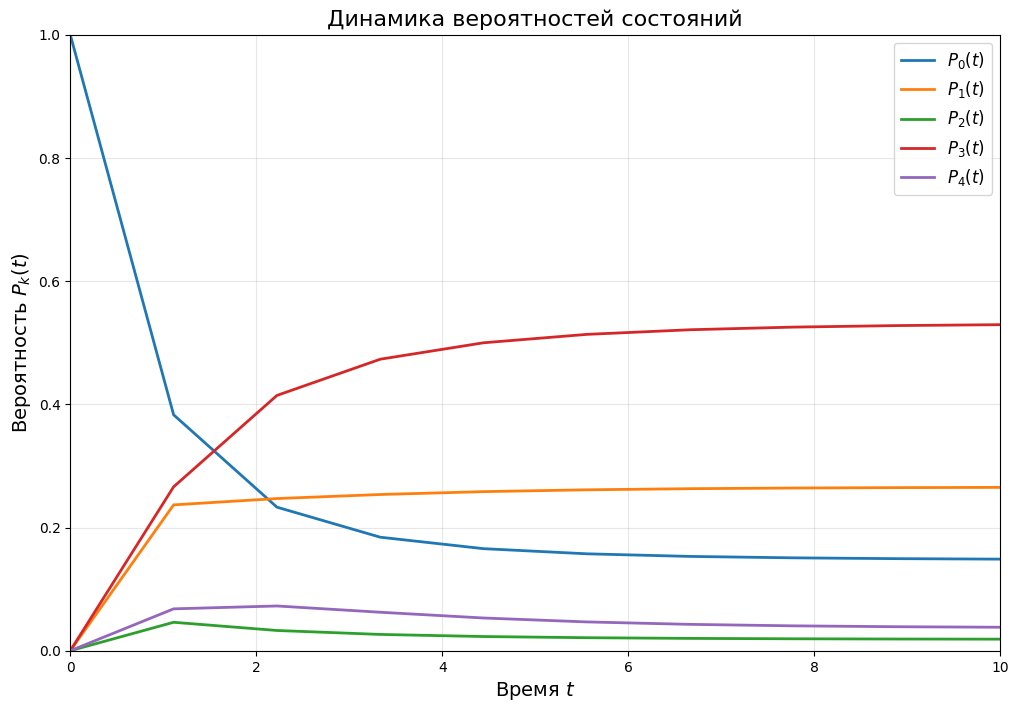

P_0(10) = 0.148687649
P_1(10) = 0.265140411
P_2(10) = 0.018768151
P_3(10) = 0.529290289
P_4(10) = 0.038113500


In [ ]:
from scipy.integrate import solve_ivp

def system(t, P):
    return A @ P

P0 = np.array([1.0, 0, 0, 0, 0])

t_span = (0, 10)  
t_eval = np.linspace(0, 10, 100)  

solution = solve_ivp(system, t_span, P0, t_eval=t_eval, method='RK45', rtol=1e-9, atol=1e-12)


plt.figure(figsize=(12, 8))
labels = ['$P_0(t)$', '$P_1(t)$', '$P_2(t)$', '$P_3(t)$', '$P_4(t)$']

for i in range(5):
    plt.plot(solution.t, solution.y[i], label=labels[i], linewidth=2)

plt.xlabel('Время $t$', fontsize=14)
plt.ylabel('Вероятность $P_k(t)$', fontsize=14)
plt.title('Динамика вероятностей состояний', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.show()

for i in range(5):
    print(f"P_{i}(10) = {solution.y[i, -1]:.9f}")